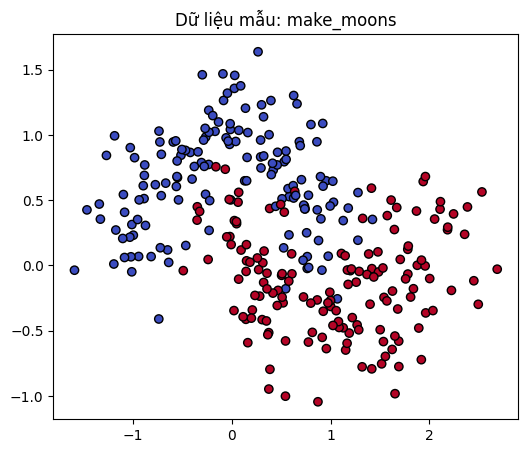

[[ 0.86439552 -0.26450934]
 [ 2.45115375 -0.11754986]
 [-0.35071234  0.44921105]
 [ 0.74129551  0.43291883]
 [ 1.18875554 -0.51830128]]
[1 1 1 0 1]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Tạo dữ liệu phi tuyến
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Plot dữ liệu
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Dữ liệu mẫu: make_moons")
plt.show()

print(X[:5])
print(y[:5])


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion="gini",      # hoặc "entropy"
    max_depth=5,           # cho đẹp
    random_state=42
)

tree.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


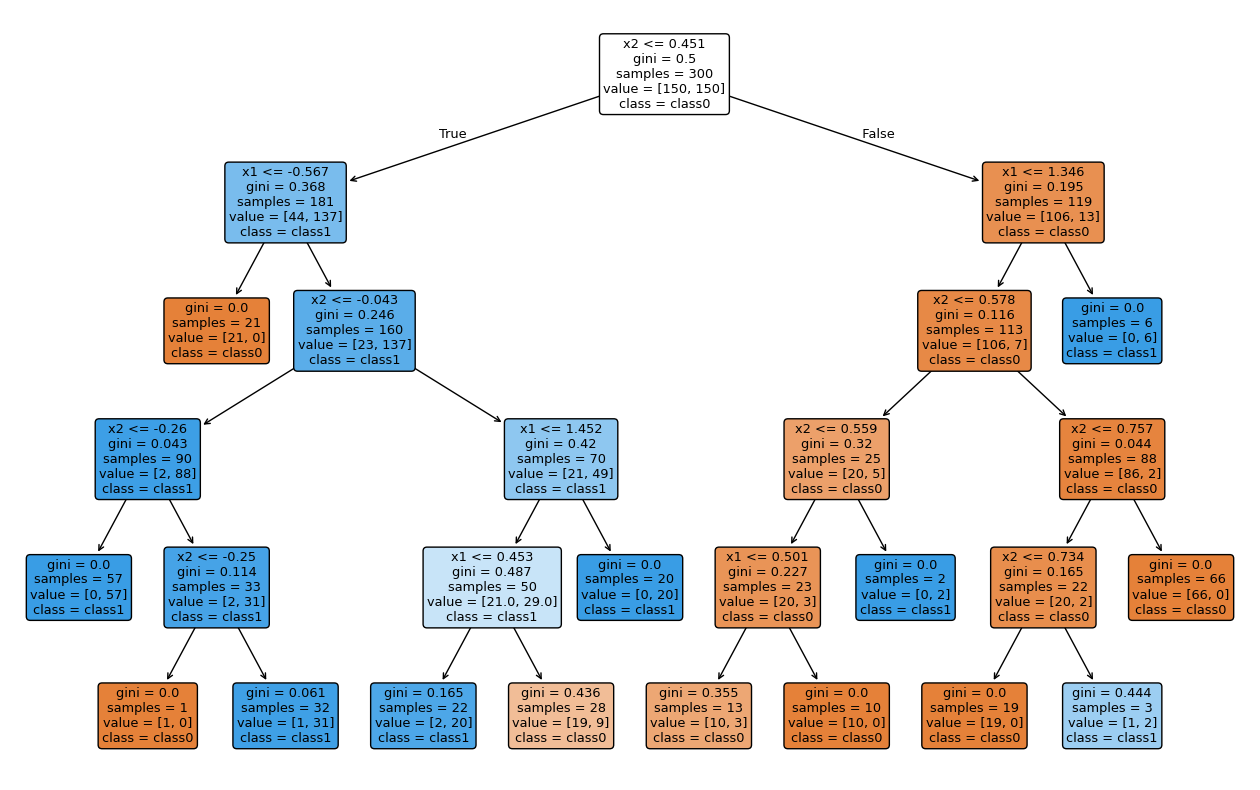

In [5]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    feature_names=["x1", "x2"],
    class_names=["class0","class1"]
)
plt.show()


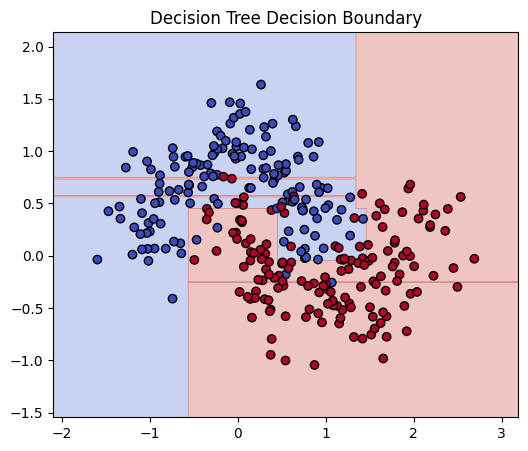

In [6]:
# tạo lưới để vẽ boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# vẽ quyết định
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# vẽ dữ liệu thật
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Decision Tree Decision Boundary")
plt.show()

In [7]:
import pandas as pd

data = {
    "date": [
        "31/02/2024",   # OK
        "31/02/2024",   # Lỗi (tháng 2 không có 31)
        "15/05/2023",   # OK
        "32/01/2022",   # Lỗi ngày 32
        "abc",          # Lỗi ký tự không hợp lệ
        "10/13/2024",   # Lỗi tháng 13
    ]
}

df = pd.DataFrame(data)
print(df)

         date
0  31/02/2024
1  31/02/2024
2  15/05/2023
3  32/01/2022
4         abc
5  10/13/2024


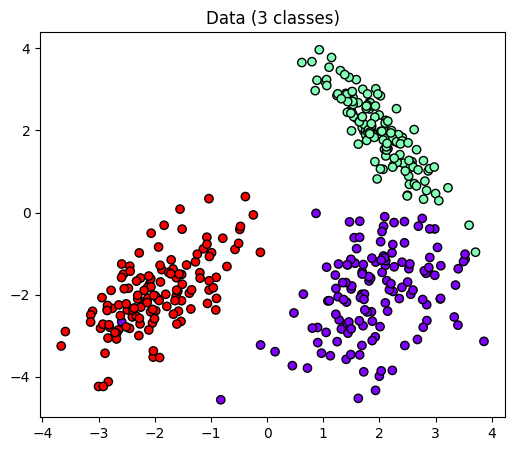

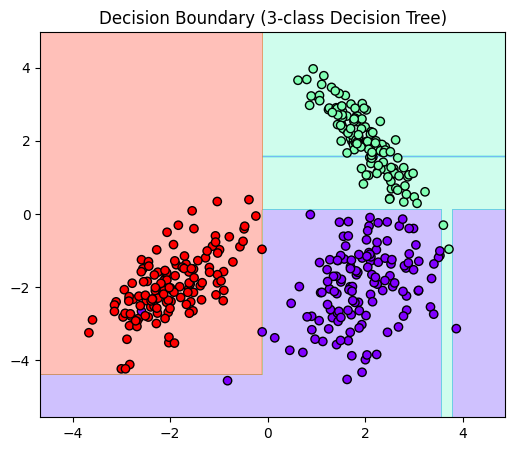

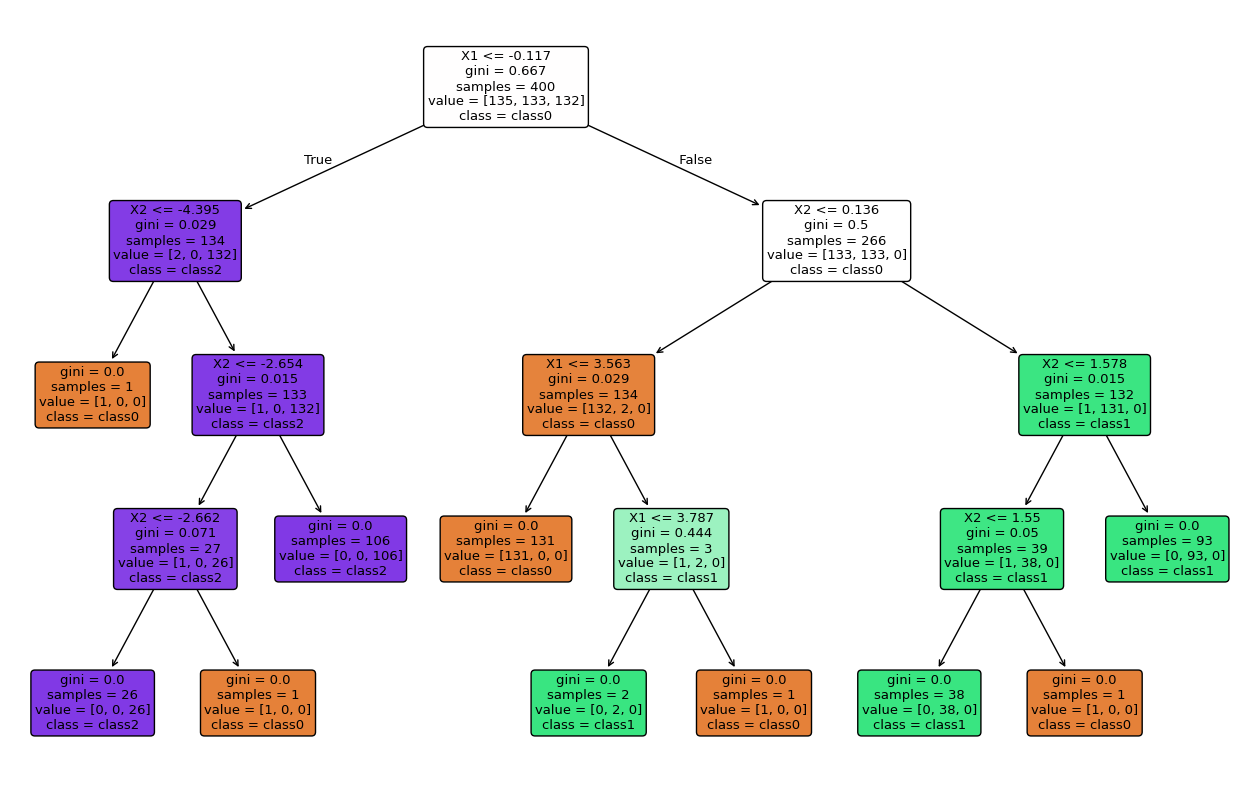

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification

# ============================================
# 1) Tạo dữ liệu 3 lớp (0,1,2)
# ============================================
X, y = make_classification(
    n_samples=400,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    class_sep=2.0,
    random_state=42
)

# Visualize dữ liệu ban đầu
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow", edgecolor="k")
plt.title("Data (3 classes)")
plt.show()

# ============================================
# 2) Train Decision Tree Classifier
# ============================================
tree = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=4,
    random_state=42
)
tree.fit(X, y)

# ============================================
# 3) Trực quan hóa Decision Boundary (biên quyết định)
# ============================================
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, cmap="rainbow", alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap="rainbow", edgecolor="k")
plt.title("Decision Boundary (3-class Decision Tree)")
plt.show()

# ============================================
# 4) Vẽ cây quyết định
# ============================================
plt.figure(figsize=(16,10))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    class_names=["class0", "class1", "class2"],
    feature_names=["X1","X2"]
)
plt.show()


In [9]:
import pandas as pd
from src.utils.path_converter import path_converter

In [10]:
df = pd.read_csv(path_converter("/data/raw/sales_train.csv"), encoding="latin1")

print(df.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0


DataFrame sau khi lọc outlier:
              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
5       2013-01-10               0       25     2564      349.00   
...            ...             ...      ...      ...         ...   
2935844 2015-10-10              33       25     7409      299.00   
2935845 2015-10-09              33       25     7460      299.00   
2935846 2015-10-14              33       25     7459      349.00   
2935847 2015-10-22              33       25     7440      299.00   
2935848 2015-10-03              33       25     7460      299.00   

         item_cnt_day  Cluster  
0                 1.0        0  
1                 1.0        2  
3                 1.0        2  
4                 1.

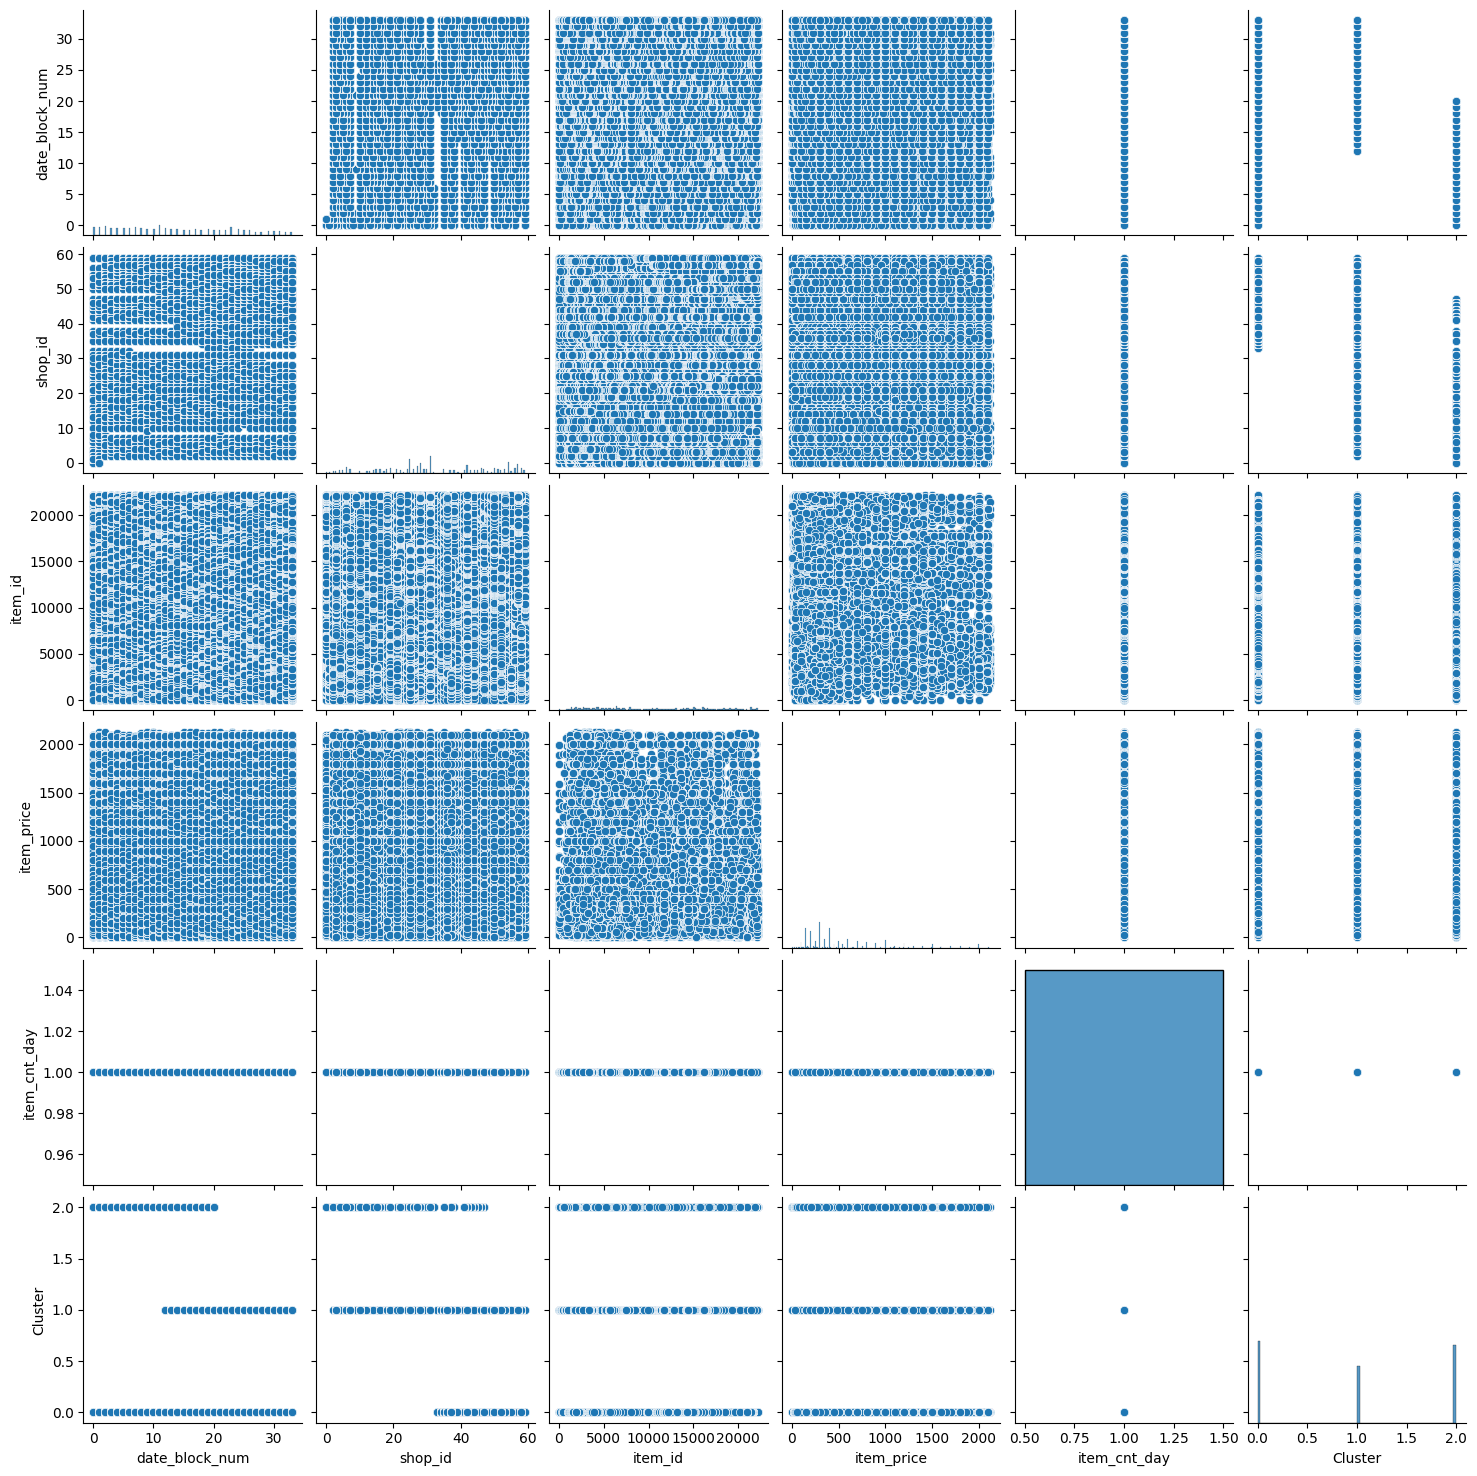

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. Tạo DataFrame mẫu
# ==========================================


# ==========================================
# 2. Convert date → datetime
# ==========================================
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")

# ==========================================
# 3. Lọc outlier bằng IQR cho tất cả numeric columns
# ==========================================
numeric_cols = df.select_dtypes(include=[np.number]).columns


def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean


df_filtered = remove_outliers_iqr(df, numeric_cols)

print("DataFrame sau khi lọc outlier:")
print(df_filtered)

# ==========================================
# 4. Vẽ Pair Plot
# ==========================================
sns.pairplot(df_filtered[numeric_cols], )
plt.show()